<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Numerical Solutions (Good)</span></div>

## 1 Differential Equations and Euler

### 1.2 What do we mean by changes?

In [ ]:

# Your code here


### 1.3 Calculus: Meaning and Notation

In [ ]:

# Your code here


### 1.4 Calculus: Getting a feel for \(\dfrac{dN}{dt}\)

In [ ]:

# Your code here


### 1.5 Solving Differential Equations

In [ ]:

# Your code here


### 1.6 The Euler Method

In [ ]:

# Your code here


### 1.7 Using Euler for the logistic equation

In [1]:
import numpy as np
from matplotlib import pyplot as plt

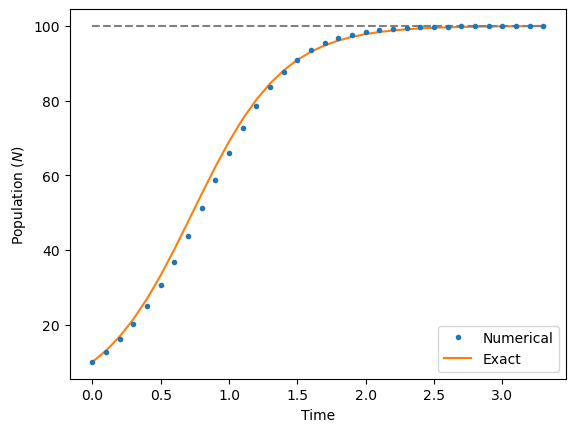

In [20]:
def logistic(time, N0, carrying_capacity, rate): 
    '''
    This outputs the exact solution to
    the logistic differential equation. 
    '''
    C = 1/N0-1/carrying_capacity
    output = (1 + C * carrying_capacity * np.exp(-rate * time))
    output = carrying_capacity/output
    return output

N_stop_difference = 1E-2

dt = 0.1
N0, K, rate = 10, 100, 3
data = {'time': [], 'N': []}
time, N = 0, N0

while True:
    data['time'].append(time)
    data['N'].append(N)
    
    dN = rate * N * (1-N/K) * dt
    N += dN
    time += dt
    
    try: 
        if np.abs(data['N'][-1]-data['N'][-2]) <= N_stop_difference:
            break
            
    except IndexError: 
        if len(data['N']) < 2: 
            pass
        else: 
            print('Trouble')
            quit()
            
exact_data = logistic(time = np.array(data['time']), 
                     N0 = N0, 
                     carrying_capacity = K, 
                     rate = rate)

plt.plot(data['time'], data['N'], '.', label = 'Numerical')
plt.plot(data['time'], exact_data,
        label = 'Exact', zorder = 1) # zorder = pushes the plot back
plt.legend(loc = 'lower right')
plt.ylabel('Population ($N$)')
plt.xlabel('Time')
plt.hlines(K, 0, data['time'][-1],
          colors = 'grey', ls = 'dashed', zorder = 1)



### 1.8 Some things to note about the code

In [ ]:

# Your code here


## 2 Coupled Differential Equations: Predator-Prey Model

### 2.1 The equations

In [ ]:

# Your code here


### 2.2 Example code

Text(0.5, 1.0, 'Foxes vs Rabbits')

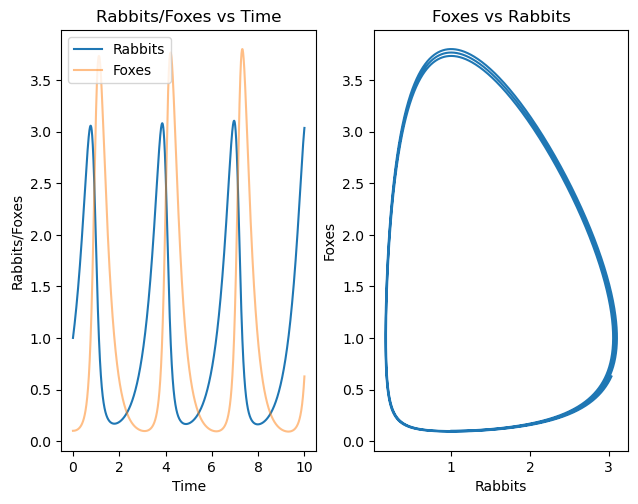

In [13]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, 0.1
time, rabbits, foxes = 0, rabbits0, foxes0
data = []

def drabbits_dt(rabbits, foxes): 
    a, b = 2, 2
    return a*rabbits - b*rabbits*foxes

def dfoxes_dt(rabbits, foxes):
    d, g = 3, 3
    return d*foxes*rabbits - g*foxes

while True:
    data.append([time, rabbits, foxes])
    
    rabbits_new = rabbits + drabbits_dt(rabbits, foxes) * dt
    
    foxes += dfoxes_dt(rabbits, foxes) * dt
    
    rabbits = rabbits_new
    
    time += dt
    
    if time > max_time: 
        break
        
data = np.array(data)
data = {
    'time': data[:, 0],
    'rabbits': data[:, 1],
    'foxes': data[:, 2],
}


fig, ax = plt.subplots(nrows = 1, ncols = 2)
plt.tight_layout()
ax_with_time, ax_with_other = ax

ax_with_time.plot(data['time'], data['rabbits'], label = 'Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label = 'Foxes', alpha = 0.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend(loc = 'upper left')

ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')


### 2.3 Some things to note about the code

In [ ]:

# Your code here


## 3 Hello SciPy

### 3.1 SciPy odeint()

In [2]:
from scipy.integrate import odeint

### 3.2 Radioactivity

Text(0, 0.5, '$N$')

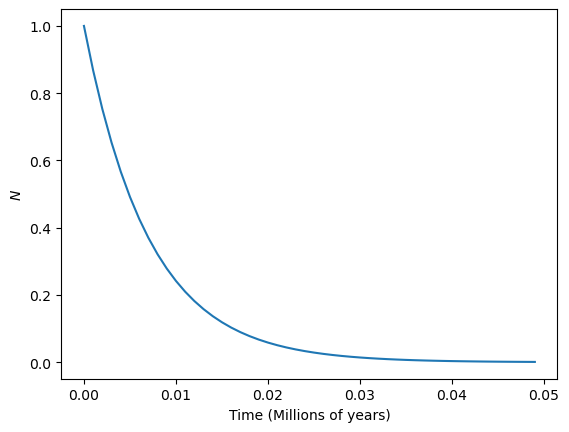

In [19]:
max_time = 0.05
dt = 0.001
decay_constant = 142
N0 = 1

def dNdt(N, time, decay_constant):
    '''
    Function for the derivative. 
    '''
    return - decay_constant * N

all_time = np.arange(0, max_time, dt)

all_N = odeint(y0 = [N0],
              func = dNdt,
              t = all_time,
              args=(decay_constant,)
              )
plt.plot(all_time, all_N)
plt.xlabel('Time (Millions of years)')
plt.ylabel('$N$')


### 3.3 Logistic Equation

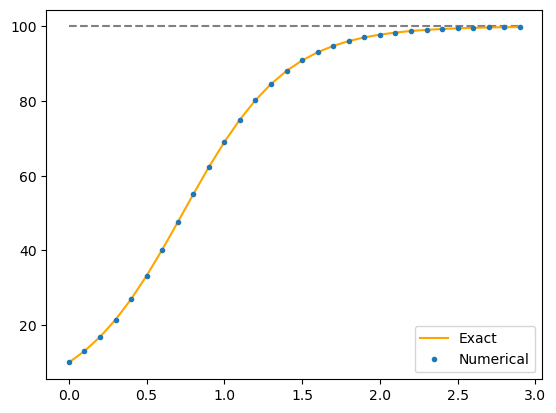

In [36]:
def dNdt(N, time, rate, carrying_capacity):
    '''
    Function for the derivative
    '''
    return rate * N * (1-N/carrying_capacity)


max_time, dt = 3, 0.1
N0, K, rate = 10, 100, 3

data = {}
data['time'] = np.arange(0, max_time, dt)
data['N'] = odeint(dNdt, N0, data['time'], (rate, K))


plt.plot(data['time'], data['N'], color = 'orange', label = 'Exact')
plt.plot(data['time'], data['N'], '.', label = 'Numerical')
plt.hlines(K, 0, data['time'][-1],
           colors='grey', ls='dashed', zorder=1)
plt.legend(loc = 'lower right')


### 3.4 Predator-Prey

Text(0.5, 1.0, 'Foxes vs Rabbits')

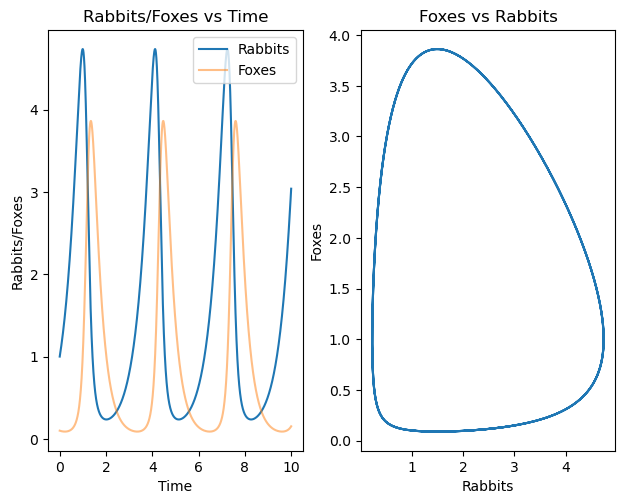

In [44]:
max_time = 10
dt = 0.001
rabbits0, foxes0 = 1, 0.1

def dy_dt(y, t):
    '''
    Function for the derivative. 
    y contains all the variables for the simulation
    t is the dependent variable
    '''
    
    rabbits, foxes = y
    
    # for rabbits
    a, b = 2, 2
    drabbits_dt = a*rabbits - b*rabbits*foxes
    
    # for foxes 
    d, g = 3, 3
    dfoxes_dt = a*foxes*rabbits - g*foxes
    
    return [drabbits_dt, dfoxes_dt]

data = {}
data['time'] = np.arange(0, max_time, dt)

results = odeint(y0 = [rabbits0, foxes0],
                func = dy_dt, 
                t = data['time']
                )

data['rabbits'] = results[:, 0]
data['foxes'] = results[:, 1]

fig, ax = plt.subplots(nrows=1, ncols=2)
ax_with_time, ax_with_other = ax

plt.tight_layout()

ax_with_time.plot(data['time'], data['rabbits'], label='Rabbits')
ax_with_time.plot(data['time'], data['foxes'], label='Foxes', alpha=0.5)
ax_with_time.set_ylabel('Rabbits/Foxes')
ax_with_time.set_xlabel('Time')
ax_with_time.set_title(f'Rabbits/Foxes vs Time')
ax_with_time.legend()

ax_with_other.plot(data['rabbits'], data['foxes'])
ax_with_other.set_xlabel('Rabbits')
ax_with_other.set_ylabel('Foxes')
ax_with_other.set_title(f'Foxes vs Rabbits')

## Exercise 1 :  The Lorentz Attaractor

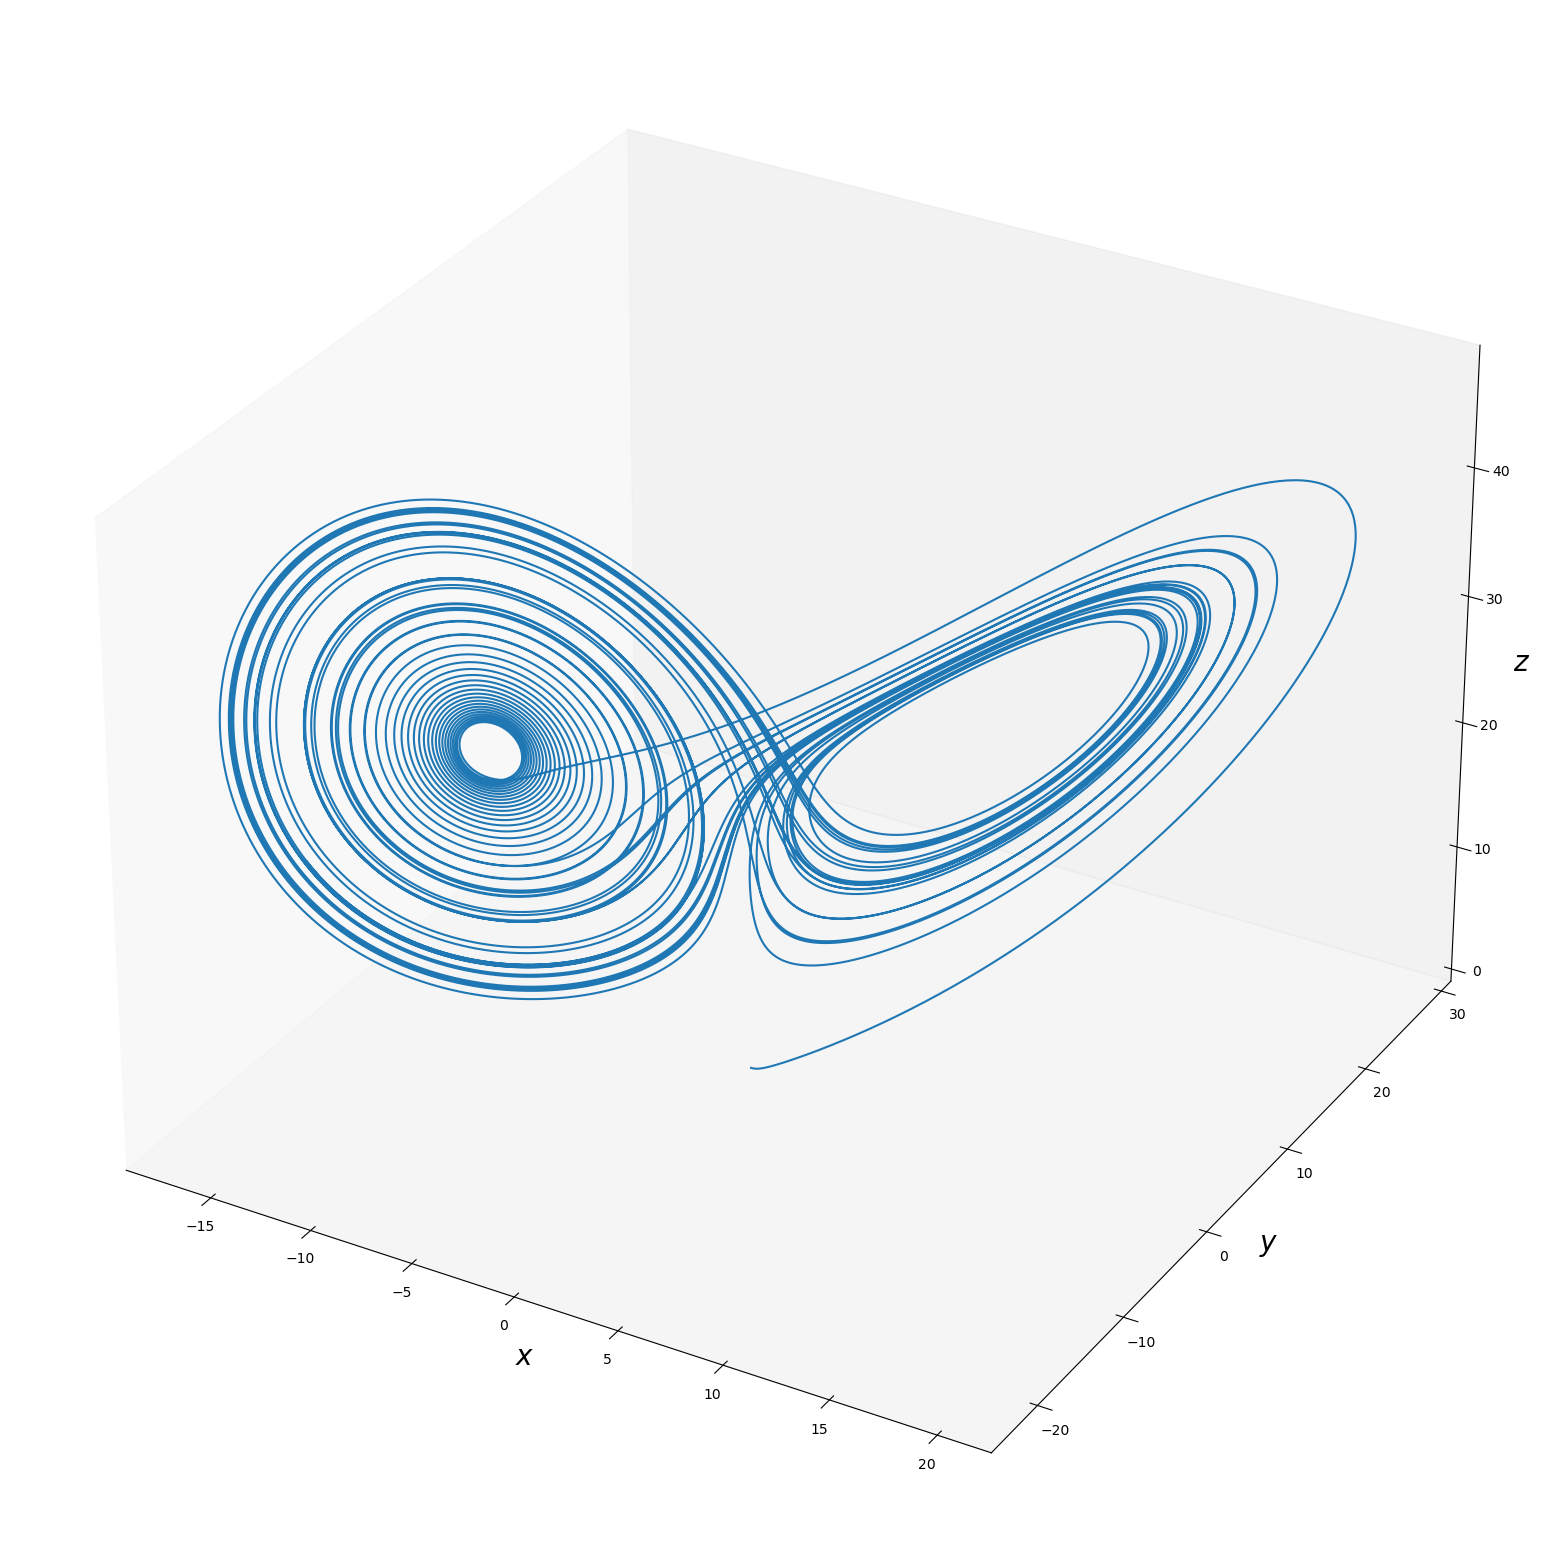

In [23]:
maxtime = 50
dt = 0.001
xstart, ystart, zstart = 0, 1, 0

def du_dt(u, t):
    
    x, y, z = u
    
    dx_dt = 10*(y - x)
    
    dy_dt = x*(28 - z) - y
    
    dz_dt = x*y - (8/3)*z
    
    return [dx_dt, dy_dt, dz_dt]

datas = {}
datas['time'] = np.arange(0, maxtime, dt)

results_1 = odeint(y0 = [xstart, ystart, zstart],
                  func = du_dt, 
                  t = datas['time'])

x = results_1[:, 0]
y = results_1[:, 1]
z = results_1[:, 2]

plt.figure(figsize=(20, 20))
ax = plt.axes(projection='3d')
ax.plot3D(x, y, z)
ax.set_xlabel('$x$', size = 20)
ax.set_xticks(list(np.arange(-15, 21, 5)))
ax.set_ylabel('$y$', size = 20)
ax.set_zlabel('$z$', size = 20)
ax.grid(False)
plt.show()


In [19]:
list(np.arange(-15, 21, 5)) # better way to generate values instead of typing one by one 

[-15, -10, -5, 0, 5, 10, 15, 20]